# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [55]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/1ib/python3.10/site-packages"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

  Using cached opencv-python-headless-4.5.3.56.tar.gz (89.2 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [842 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "linux" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
from torch.utils.data import DataLoader

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
# Define transforms - Data is preprocessed and converted to a tensor, either using the .ToTensor() transform from torchvision.transforms or simply manually with torch.Tensor.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]) # 1 channel grayscale not 3 channels

# A DataLoader object for both train and test sets is created using the train and test sets loaded from torchvision.

# Define train and test data
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

# Define train and test loaders
train_loader = DataLoader(train_data, batch_size=28, shuffle=True)
test_loader = DataLoader(test_data, batch_size=28)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

9


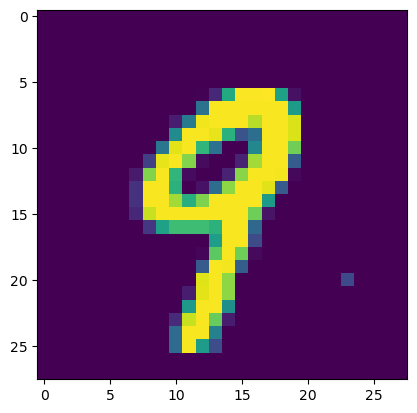

7


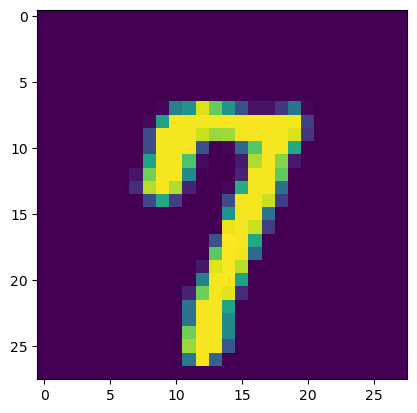

5


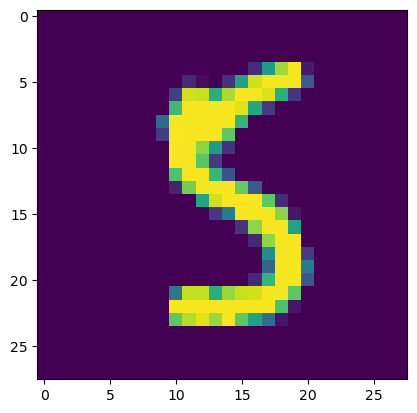

6


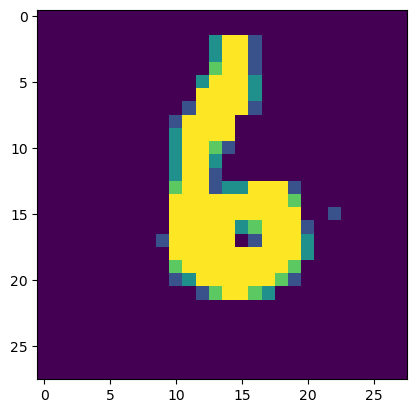

3


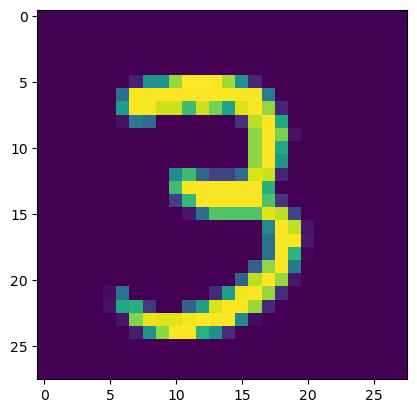

4


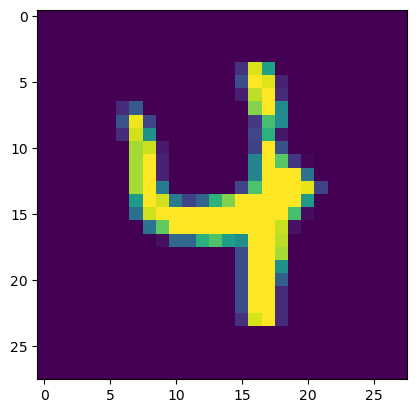

8


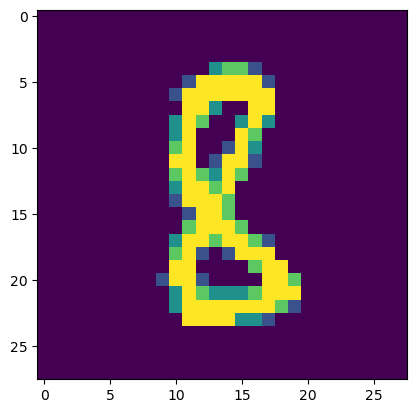

4


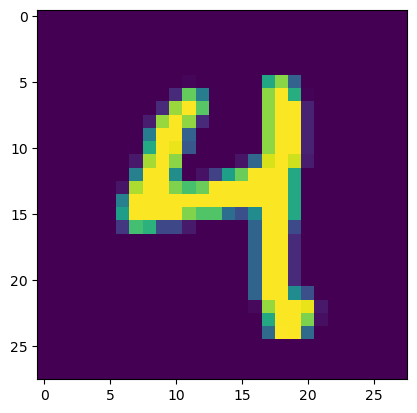

3


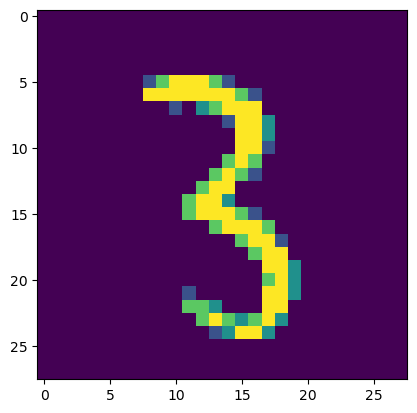

7


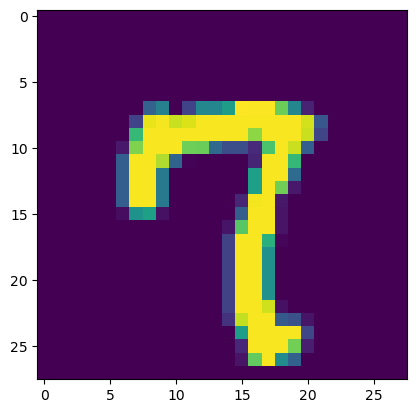

In [7]:
# Explore data - Notebook contains code which shows the size and shape of the training and test data
transform_raw = transforms.Compose([transforms.ToTensor()])

training_data_raw = datasets.MNIST(root="data", train=True, download=True, transform = transform_raw)
train_loader_raw = DataLoader(training_data_raw, batch_size=32, shuffle=True)

show5(train_loader_raw)

testing_data_raw = datasets.MNIST(root="data", train=True, download=True, transform = transform_raw)
test_loader_raw = DataLoader(testing_data_raw, batch_size=32, shuffle=True)

show5(test_loader_raw)

In [8]:
# Explore data
print("Number of MNIST train data examples: {}".format(len(train_data)))
print("Number of MNIST test data examples: {}".format(len(test_data)))

Number of MNIST train data examples: 60000
Number of MNIST test data examples: 10000


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # define activation function
        self.activation = F.relu
        # define dropout
        self.dropout = nn.Dropout(p=0.5) # dropout implemented as a layer p is the probablity we set for zeroing out a neuron
        # define layers
        self.fc1 = nn.Linear(28 * 28 * 1, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # flatten all dimensions except batch
        x = self.dropout(x) # can use wherever we like since no input or output size requirements
        x = torch.flatten(x, 1)
        # feed forward
        x = self.activation(self.fc1(x))
        x = self.dropout(x) # can use wherever we like since no input or output size requirements
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()
net.to(device)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([120, 784])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
# specify optimizer to minimise the loss function
optimizer = optim.Adam(net.parameters(), lr=0.001) # lr is learning rate

# could also use SGD e.g. optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

# specify loss function
criterion = nn.CrossEntropyLoss()

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'params': [0, 1, 2, 3, 4, 5]}]


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
# Train Model Function
train_loss_history = list()
val_loss_history = list()
    
def train_model(net, optimizer, criterion, train_loader, num_epochs):
    
    best_val_loss = float('inf') # sets best val loss to infinity as starting point since monitoring for improvement later
    threshold = 0.001 # set threshold for min performence improvement
    below_threshold = 0 # sets starting point for how many times fallen below threshold
    patience = 2 # sets how many epochs to allow for performance to fall below threshold

    for epoch in range(num_epochs):

        net.train() # trains model
        train_loss = 0.0 # sets startin point of epoch loss to zero
        train_correct = 0 # sets number of correct predictions to starting point of zero

        for i, data in enumerate(train_loader): # enumerate to keep track of the batches we've iterated over
            
            inputs, labels = data # to get the inputs and labels within batch, i
            inputs, labels = inputs.to(device), labels.to(device) # to cuda or cpu, see start of notebook   
            optimizer.zero_grad() # Zeros out the gradients of the optimizer
            outputs = net(inputs) # Get the outputs from the model
            loss = criterion(outputs, labels) # computes the loss in the context of our criterion
            loss.backward() # Compute the gradient of the loss with respect to the parameters using the backward method
            optimizer.step() # updates the parameters by taking a step with the optimizer
            
            _, preds = torch.max(outputs.data, 1) # gets predictions from the outputs, 1 is the axis to look at
            train_correct += (preds == labels).sum().item() # update the number of correct training examples
            train_loss += loss.item() # update the running loss for the epoch

        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
        
        train_loss_history.append(train_loss/len(train_loader))

        # perform validation
        
        val_loss = 0.0 # sets validation loss
        val_correct = 0
        net.eval() # set to eval so we're not computing the gradients of the inputs
        
        for inputs, labels in train_loader: # or could instead use a 'validation_loader' if using 3 way split, note tutorials used test loader here

            inputs, labels = inputs.to(device), labels.to(device) # to cuda or cpu, see start of notebook 
            outputs = net(inputs) # compute outputs
            loss = criterion(outputs, labels) # compute loss
            _, preds = torch.max(outputs.data, 1) # compute predictions
            val_correct += (preds == labels).sum().item() # calculate number of correct predictions
            val_loss += loss.item() # updates the validation loss with the loss for the batch

        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(train_loader):.2f}% validation loss: {val_loss/len(train_loader):.5f}')
        
        val_loss_history.append(val_loss/len(train_loader))

        diff = best_val_loss - val_loss # calulates the difference between the best val loss and the val loss

        # sets the best val loss to the current loss if smaller
        if best_val_loss > val_loss:
            best_val_loss = val_loss

        # if patience exceeded breaks training
        if diff <= threshold:
            below_threshold += 1
            if below_threshold > patience:
                break

Plot the training loss (and validation loss/accuracy, if recorded).

In [12]:
train_model(net, optimizer, criterion, train_loader, num_epochs = 10)

Epoch 1 training accuracy: 21.55% training loss: 0.69939
Epoch 1 validation accuracy: 25.65% validation loss: 0.28320
Epoch 2 training accuracy: 23.30% training loss: 0.52585
Epoch 2 validation accuracy: 26.28% validation loss: 0.21110
Epoch 3 training accuracy: 23.67% training loss: 0.48190
Epoch 3 validation accuracy: 26.36% validation loss: 0.20453
Epoch 4 training accuracy: 23.92% training loss: 0.45711
Epoch 4 validation accuracy: 26.38% validation loss: 0.19522
Epoch 5 training accuracy: 24.00% training loss: 0.44399
Epoch 5 validation accuracy: 26.61% validation loss: 0.17671
Epoch 6 training accuracy: 24.10% training loss: 0.43436
Epoch 6 validation accuracy: 26.65% validation loss: 0.17050
Epoch 7 training accuracy: 24.22% training loss: 0.42266
Epoch 7 validation accuracy: 26.68% validation loss: 0.17800
Epoch 8 training accuracy: 24.26% training loss: 0.41793
Epoch 8 validation accuracy: 26.68% validation loss: 0.17082
Epoch 9 training accuracy: 24.31% training loss: 0.41273

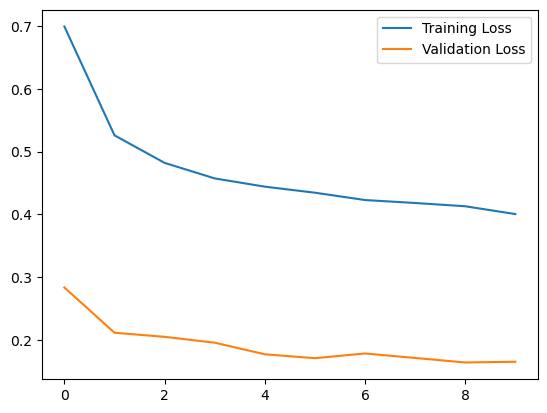

In [13]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

Epoch 1 test accuracy: 26.69% validation loss: 0.16130
Epoch 2 test accuracy: 26.69% validation loss: 0.16130
Epoch 3 test accuracy: 26.69% validation loss: 0.16130
Epoch 4 test accuracy: 26.69% validation loss: 0.16130
Epoch 5 test accuracy: 26.69% validation loss: 0.16130
Epoch 6 test accuracy: 26.69% validation loss: 0.16130
Epoch 7 test accuracy: 26.69% validation loss: 0.16130
Epoch 8 test accuracy: 26.69% validation loss: 0.16130
Epoch 9 test accuracy: 26.69% validation loss: 0.16130
Epoch 10 test accuracy: 26.69% validation loss: 0.16130


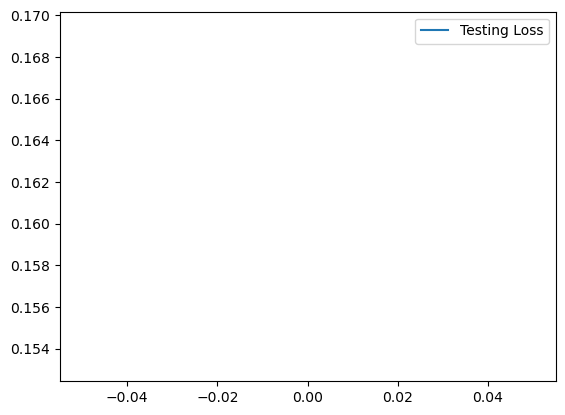

In [14]:
num_epochs = 10

for epoch in range(num_epochs):

    test_loss = 0.0 # sets validation loss
    test_correct = 0
    net.eval()
    test_loss_history = list()

    for inputs, labels in test_loader:

        inputs, labels = inputs.to(device), labels.to(device) # to cuda or cpu, see start of notebook 
        outputs = net(inputs) # compute outputs
        loss = criterion(outputs, labels) # compute loss
        _, preds = torch.max(outputs.data, 1) # compute predictions
        test_correct += (preds == labels).sum().item() # calculate number of correct predictions
        test_loss += loss.item() # updates the validation loss with the loss for the batch

    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% validation loss: {test_loss/len(test_loader):.5f}')

    test_loss_history.append(test_loss/len(test_loader))

plt.plot(test_loss_history, label="Testing Loss")
plt.legend()
plt.show()

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

# specify loss function
criterion = nn.CrossEntropyLoss()

train_model(net, optimizer, criterion, train_loader, num_epochs = 10)

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 1e-05, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1, 2, 3, 4, 5]}]
Epoch 1 training accuracy: 23.71% training loss: 0.50794
Epoch 1 validation accuracy: 26.48% validation loss: 0.20561
Epoch 2 training accuracy: 23.79% training loss: 0.49536
Epoch 2 validation accuracy: 26.59% validation loss: 0.19156
Epoch 3 training accuracy: 23.82% training loss: 0.49962
Epoch 3 validation accuracy: 26.68% validation loss: 0.18226
Epoch 4 training accuracy: 23.92% training loss: 0.48966
Epoch 4 validation accuracy: 26.62% validation loss: 0.18568
Epoch 5 training accuracy: 23.91% training loss: 0.48644
Epoch 5 validation accuracy: 26.61% validation loss: 0.19187
Epoch 6 training accuracy: 23.96% training loss: 0.48090
Epoch 6 validation accuracy: 26.65% validation loss: 0.19965


## Saving your model
Using `torch.save`, save your model for future loading.

In [16]:
torch.save

<function torch.serialization.save(obj: object, f: Union[str, os.PathLike, BinaryIO, IO[bytes]], pickle_module: Any = <module 'pickle' from '/opt/conda/lib/python3.10/pickle.py'>, pickle_protocol: int = 2, _use_new_zipfile_serialization: bool = True) -> None>